<a href="https://colab.research.google.com/github/GenAIUnplugged/pytorch/blob/main/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

VOC (Pascal VOC)
For detection and segmentation.

Provided by: torchvision.datasets.VOCDetection, VOCSegmentation

100%|██████████| 460M/460M [00:14<00:00, 32.3MB/s]


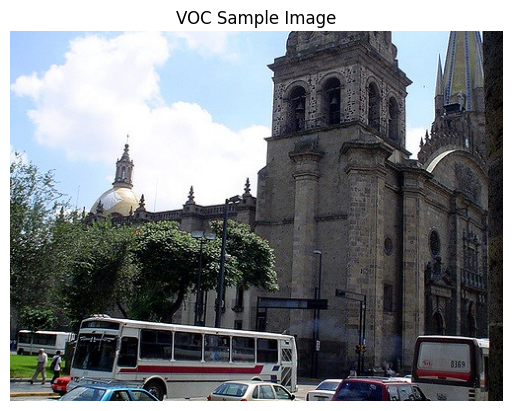

Annotation keys: dict_keys(['folder', 'filename', 'source', 'owner', 'size', 'segmented', 'object'])
Objects in image:
 - car, bbox: {'xmin': '42', 'ymin': '349', 'xmax': '59', 'ymax': '368'}
 - car, bbox: {'xmin': '48', 'ymin': '354', 'xmax': '152', 'ymax': '375'}
 - car, bbox: {'xmin': '199', 'ymin': '354', 'xmax': '294', 'ymax': '375'}
 - car, bbox: {'xmin': '302', 'ymin': '351', 'xmax': '339', 'ymax': '375'}
 - car, bbox: {'xmin': '327', 'ymin': '351', 'xmax': '425', 'ymax': '375'}
 - person, bbox: {'xmin': '19', 'ymin': '322', 'xmax': '36', 'ymax': '358'}
 - person, bbox: {'xmin': '42', 'ymin': '324', 'xmax': '54', 'ymax': '358'}
 - bus, bbox: {'xmin': '58', 'ymin': '290', 'xmax': '294', 'ymax': '375'}
 - bus, bbox: {'xmin': '408', 'ymin': '309', 'xmax': '489', 'ymax': '375'}
 - bus, bbox: {'xmin': '6', 'ymin': '303', 'xmax': '68', 'ymax': '329'}


In [1]:
import torchvision
from torchvision.datasets import VOCDetection
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt
import torch
import random

# Load Pascal VOC 2007 dataset
dataset = VOCDetection(root='./data', year='2007', image_set='train', download=True)

# Pick a random sample
img, target = dataset[random.randint(0, len(dataset)-1)]

# Show image and labels
plt.imshow(img)
plt.axis('off')
plt.title("VOC Sample Image")
plt.show()

# Print labels
print("Annotation keys:", target['annotation'].keys())
print("Objects in image:")
for obj in target['annotation']['object']:
    print(f" - {obj['name']}, bbox: {obj['bndbox']}")


In [ ]:
# Convert image to tensor
img_tensor = F.to_tensor(img)

# Add batch dimension
img_tensor = img_tensor.unsqueeze(0)

In [ ]:
import torchvision.models.detection as detection

# Load pretrained model
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Inference
with torch.no_grad():
    prediction = model(img_tensor)[0]

# Show predicted boxes
print("Predicted labels and boxes:")
for label, box, score in zip(prediction['labels'], prediction['boxes'], prediction['scores']):
    if score > 0.5:
        print(f"Class: {label}, Score: {score:.2f}, Box: {box}")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Predicted labels and boxes:
Class: 1, Score: 1.00, Box: tensor([425.5629, 180.6087, 458.2597, 246.4403])
Class: 3, Score: 1.00, Box: tensor([  0.0000, 143.7151, 160.8370, 212.6449])
Class: 1, Score: 0.99, Box: tensor([443.2003,  87.6713, 458.0731, 126.2286])
Class: 1, Score: 0.99, Box: tensor([336.4965,  66.7768, 349.5514,  83.9338])
Class: 1, Score: 0.99, Box: tensor([174.6008,  98.9297, 197.4492, 147.7121])
Class: 3, Score: 0.98, Box: tensor([158.7759, 176.8197, 353.5674, 272.7263])
Class: 1, Score: 0.97, Box: tensor([468.9475,  85.7024, 485.2565, 121.3443])
Class: 8, Score: 0.96, Box: tensor([142.7801,  37.3103, 195.2511,  68.0134])
Class: 3, Score: 0.96, Box: tensor([129.7364,  65.7885, 223.8834, 108.2016])
Class: 1, Score: 0.94, Box: tensor([396.0712, 122.9244, 418.3649, 191.0914])
Class: 1, Score: 0.94, Box: tensor([ 14.1461, 233.0631,  50.8539, 307.1888])
Class: 1, Score: 0.94, Box: tensor([259.4935,  76.0969, 268.7148, 101.7470])
Class: 1, Score: 0.92, Box: tensor([234.6500,  7

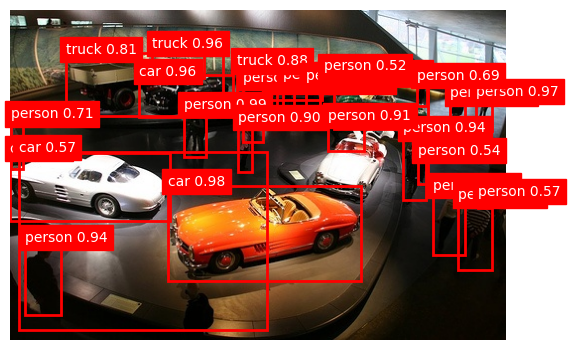

In [ ]:
from matplotlib.patches import Rectangle

# COCO label names (simplified - 80 classes + background)
COCO_CLASSES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
    'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table',
    'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

def show_boxes(img, boxes, labels, scores, threshold=0.5):
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    for box, label, score in zip(boxes, labels, scores):
        if score > threshold:
            xmin, ymin, xmax, ymax = box
            rect = Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            # Use COCO_CLASSES instead of VOC_CLASSES
            # Check if the label is a valid index
            if 0 <= label < len(COCO_CLASSES):
                class_name = COCO_CLASSES[label]
                ax.text(xmin, ymin, f'{class_name} {score:.2f}', color='white', backgroundcolor='red', fontsize=10)
            else:
                # Handle unexpected labels, e.g., print a warning
                print(f"Warning: Skipping detection with unexpected label index: {label}")

    plt.axis('off')
    plt.show()

# Show detections
show_boxes(img, prediction['boxes'], prediction['labels'], prediction['scores'])


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Ground Truth Annotations:
 - aeroplane: bbox = {'xmin': '13', 'ymin': '121', 'xmax': '485', 'ymax': '230'}


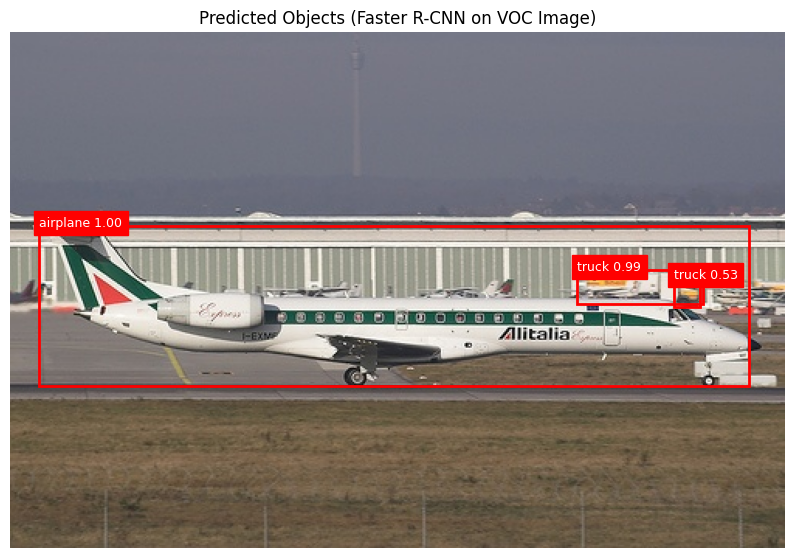

In [ ]:
import torch
import random
import torchvision
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from torchvision.datasets import VOCDetection
from torchvision import transforms
from PIL import Image

# --- COCO Class Labels (80 classes + background) ---
COCO_CLASSES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
    'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table',
    'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# --- Image Transform ---
transform = transforms.ToTensor()

# --- Load Pascal VOC Dataset ---
dataset = VOCDetection(root='./data', year='2007', image_set='train', download=True)

# --- Select a random image ---
img, target = dataset[random.randint(0, len(dataset) - 1)]
img_tensor = transform(img).unsqueeze(0)

# --- Load Pretrained Faster R-CNN (COCO) ---
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# --- Run Inference ---
with torch.no_grad():
    prediction = model(img_tensor)[0]

# --- Show Predictions ---
def show_detections(image, boxes, labels, scores, threshold=0.5):
    fig, ax = plt.subplots(1, figsize=(10, 8))
    ax.imshow(image)

    for box, label, score in zip(boxes, labels, scores):
        if score >= threshold:
            xmin, ymin, xmax, ymax = box.tolist()
            label_idx = int(label)
            class_name = COCO_CLASSES[label_idx] if 0 <= label_idx < len(COCO_CLASSES) else f"Unknown({label_idx})"
            rect = Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            ax.text(xmin, ymin, f'{class_name} {score:.2f}', color='white', fontsize=9, backgroundcolor='red')

    plt.axis('off')
    plt.title("Predicted Objects (Faster R-CNN on VOC Image)")
    plt.show()

# --- Optional: Print VOC Ground Truth ---
print("\nGround Truth Annotations:")
for obj in target['annotation']['object']:
    name = obj['name']
    bbox = obj['bndbox']
    print(f" - {name}: bbox = {bbox}")

# --- Show Results ---
show_detections(img, prediction['boxes'], prediction['labels'], prediction['scores'])


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


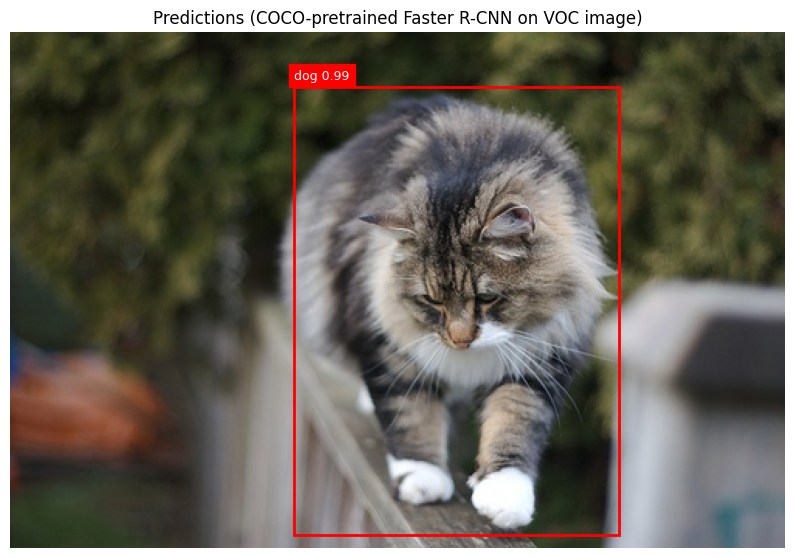

In [ ]:
import torch
import torchvision
import random
from torchvision.datasets import VOCDetection
from torchvision import transforms
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# --- COCO class labels (80 + background) ---
COCO_CLASSES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
    'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table',
    'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# --- Load VOC image just for testing ---
transform = transforms.ToTensor()
voc_dataset = VOCDetection(root='./data', year='2007', image_set='val', download=True)

# Pick a random image
img_pil, _ = voc_dataset[random.randint(0, len(voc_dataset)-1)]
img_tensor = transform(img_pil).unsqueeze(0)  # Shape: (1, 3, H, W)

# --- Load COCO-pretrained model ---
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# --- Run inference ---
with torch.no_grad():
    output = model(img_tensor)[0]

# --- Plot results ---
def show_predictions(image, boxes, labels, scores, threshold=0.8):
    fig, ax = plt.subplots(1, figsize=(10, 8))
    ax.imshow(image)

    for box, label, score in zip(boxes, labels, scores):
        if score >= threshold:
            xmin, ymin, xmax, ymax = box.tolist()
            label_idx = int(label)
            class_name = COCO_CLASSES[label_idx] if 0 <= label_idx < len(COCO_CLASSES) else f"Unknown({label_idx})"
            rect = Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='red', facecolor='none')
            ax.add_patch(rect)
            ax.text(xmin, ymin - 5, f'{class_name} {score:.2f}', color='white', backgroundcolor='red', fontsize=9)

    plt.axis('off')
    plt.title("Predictions (COCO-pretrained Faster R-CNN on VOC image)")
    plt.show()

# --- Show result ---
show_predictions(img_pil, output['boxes'], output['labels'], output['scores'])


In [ ]:
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import torch

# Load image
img = Image.open("your_image.jpg").convert("RGB")

# Preprocess
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
img_tensor = transform(img).unsqueeze(0)

# Load ResNet pretrained on ImageNet
model = models.resnet50(pretrained=True)
model.eval()

# Predict
with torch.no_grad():
    outputs = model(img_tensor)
    _, predicted = torch.max(outputs, 1)

# Get label
from torchvision.models._api import get_model_weights
imagenet_classes = get_model_weights('ResNet50_Weights.DEFAULT').meta["categories"]
print(f"Predicted: {imagenet_classes[predicted.item()]}")


In [64]:
import torch
import torchvision
from torchvision.datasets import VOCDetection

In [65]:
dataset = VOCDetection(root='./data', year='2007', image_set='train', download=True)

In [66]:
len(dataset)

2501

In [67]:
import random
image,target = dataset[random.randint(0,len(dataset)-1)]

In [68]:
target["annotation"].keys()

dict_keys(['folder', 'filename', 'source', 'owner', 'size', 'segmented', 'object'])

In [69]:
for obj in target["annotation"]["object"]:
  name = obj["name"]
  xmin = int(obj['bndbox']["xmin"])
  xmax = int(obj['bndbox']["xmax"])
  ymin = int(obj['bndbox']["ymin"])
  ymax = int(obj['bndbox']["ymax"])

In [74]:
target

{'annotation': {'folder': 'VOC2007',
  'filename': '001101.jpg',
  'source': {'database': 'The VOC2007 Database',
   'annotation': 'PASCAL VOC2007',
   'image': 'flickr',
   'flickrid': '314796167'},
  'owner': {'flickrid': 'sadisticspice', 'name': 'Spikey Gryphon'},
  'size': {'width': '500', 'height': '333', 'depth': '3'},
  'segmented': '0',
  'object': [{'name': 'person',
    'pose': 'Unspecified',
    'truncated': '1',
    'difficult': '0',
    'bndbox': {'xmin': '143', 'ymin': '61', 'xmax': '225', 'ymax': '211'}},
   {'name': 'person',
    'pose': 'Rear',
    'truncated': '1',
    'difficult': '0',
    'bndbox': {'xmin': '2', 'ymin': '28', 'xmax': '217', 'ymax': '332'}},
   {'name': 'person',
    'pose': 'Unspecified',
    'truncated': '1',
    'difficult': '0',
    'bndbox': {'xmin': '306', 'ymin': '79', 'xmax': '401', 'ymax': '311'}},
   {'name': 'person',
    'pose': 'Unspecified',
    'truncated': '1',
    'difficult': '0',
    'bndbox': {'xmin': '370', 'ymin': '82', 'xmax': 

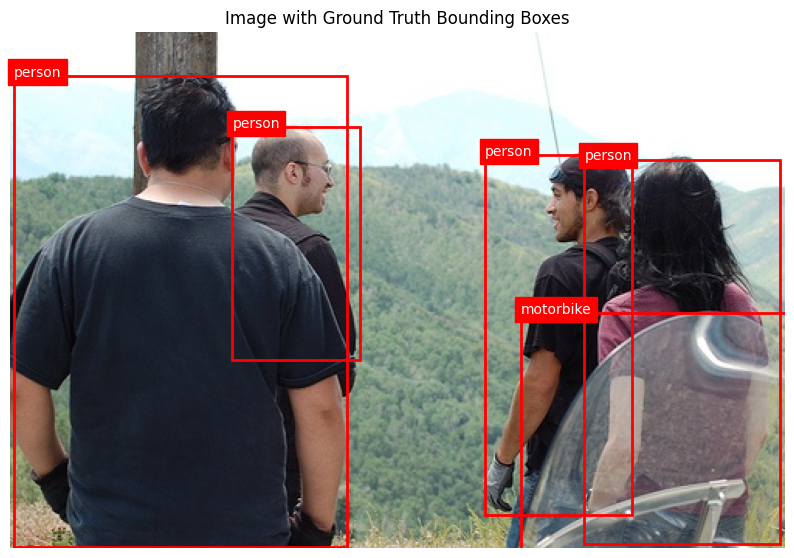

In [75]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig,ax = plt.subplots(1,figsize=(10,10))
ax.imshow(image)

for obj in target["annotation"]["object"]:
  name = obj["name"]
  xmin = int(obj['bndbox']["xmin"])
  xmax = int(obj['bndbox']["xmax"])
  ymin = int(obj['bndbox']["ymin"])
  ymax = int(obj['bndbox']["ymax"])

  rect = patches.Rectangle((xmin,ymin),xmax-xmin,ymax-ymin, linewidth=2, edgecolor='r', facecolor='none')
  ax.add_patch(rect)
  plt.text(xmin, ymin, name, color='white', backgroundcolor='red', fontsize=10)

plt.title("Image with Ground Truth Bounding Boxes")
plt.axis('off')
plt.show()

In [71]:
from torchvision.models import detection
import torchvision.transforms.functional as F

model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()
img_tensor =  F.to_tensor(image).unsqueeze(0)
with torch.no_grad():
  prediction = model(img_tensor)[0]

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [72]:
for score,label,bbox in zip(prediction["scores"],prediction["labels"],prediction["boxes"]):
  if score > 0.5:
      print(f"Class: {label}, Score: {score:.2f}, Box: {bbox}")


Class: 1, Score: 1.00, Box: tensor([  0.0000,  27.3856, 223.3234, 331.3308])
Class: 1, Score: 1.00, Box: tensor([306.6192,  76.4130, 404.7917, 319.0941])
Class: 1, Score: 0.99, Box: tensor([146.9657,  64.1411, 228.8013, 320.7927])
Class: 1, Score: 0.96, Box: tensor([336.0742,  83.0493, 487.2653, 311.4868])
Class: 1, Score: 0.91, Box: tensor([375.5934,  80.4241, 489.9686, 232.3541])


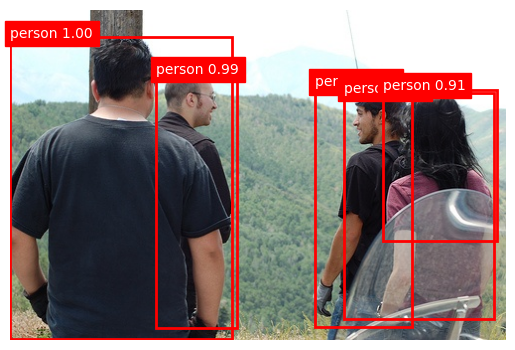

In [73]:
from matplotlib.patches import Rectangle

# COCO label names (simplified - 80 classes + background)
COCO_CLASSES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
    'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table',
    'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

def show_boxes(img, boxes, labels, scores, threshold=0.5):
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    for box, label, score in zip(boxes, labels, scores):
        if score > threshold:
            xmin, ymin, xmax, ymax = box
            rect = Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            # Use COCO_CLASSES instead of VOC_CLASSES
            # Check if the label is a valid index
            if 0 <= label < len(COCO_CLASSES):
                class_name = COCO_CLASSES[label]
                ax.text(xmin, ymin, f'{class_name} {score:.2f}', color='white', backgroundcolor='red', fontsize=10)
            else:
                # Handle unexpected labels, e.g., print a warning
                print(f"Warning: Skipping detection with unexpected label index: {label}")

    plt.axis('off')
    plt.show()

# Show detections
show_boxes(image, prediction['boxes'], prediction['labels'], prediction['scores'])